In [49]:
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm 
from datetime import  datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [50]:
# Set the directory
#Run this first for OPI cleaning
# OPI CLEANING AND AVERAGING
path = Path('U:') / 'Opi system file' / 'SQL database'/ 'New Data Processing'

In [51]:
# Original file name
filename = path / 'PHERC RAW BIN13.xls'

In [140]:
# Load file into Pandas data frame
df = pd.read_excel(filename)
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:23:28.000000,68.20\t-100.00\t-100.00\t-100.00\t-100.00\r\n,60.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,65.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,68.199997,60.400002,7.8,65.300003,7.800000,...,41.70\t42.10\t43.40\t44.40\t45.20\t46.00\t47.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00.000000,60.30\t-99.90\t59.90\t59.90\t-99.90\r\n,56.00\t-99.90\t56.40\t56.60\t-99.90\r\n,58.64\t-99.90\t58.46\t58.50\t-99.90\r\n,NaN,60.299999,56.000000,4.3,58.540001,4.300000,...,52.10\t52.30\t52.80\t53.70\t54.40\t54.60\t55.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00.000000,54.60\t-99.90\t53.80\t53.70\t-99.90\r\n,52.10\t-99.90\t52.60\t52.50\t-99.90\r\n,53.58\t-99.90\t53.20\t53.10\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.599998,52.099998,2.5,53.299999,2.500000,...,62.80\t63.30\t63.40\t64.20\t65.30\t65.50\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:20.000000,54.20\t-99.90\t53.50\t53.30\t-99.90\r\n,51.80\t-99.90\t52.40\t52.30\t-99.90\r\n,53.27\t-99.90\t52.92\t52.81\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.200001,51.799999,2.4,53.009998,2.400000,...,63.50\t64.10\t64.20\t65.50\t66.00\t65.80\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:25:26.000000,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.18\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.299999,1.5,45.180000,1.500000,...,88.50\t89.10\t89.00\t89.90\t90.30\t89.70\t89.4...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00.000000,48.00\t46.70\t50.20\t50.70\t51.20\r\n,34.90\t35.30\t35.40\t35.70\t35.70\r\n,39.68\t42.54\t42.89\t43.14\t44.24\r\n,NaN,50.700001,34.900

In [53]:
def clean_time(x):
    # Remove unnecasy charactor
    timestamp_text = x[:16]
    # Convert to Python datetime variable
    timestamp = datetime.strptime(timestamp_text, '%Y-%m-%d %H:%M')
    return timestamp

In [54]:
df['OPI_DATE'] = df['OPI_DATE'].apply(lambda x: clean_time(x))

In [55]:
df['C1'] = df['C1'].apply(lambda x: x.split('\t'))
df['C2'] = df['C2'].apply(lambda x: x.split('\t'))
df['C3'] = df['C3'].apply(lambda x: x.split('\t'))
df['C4'] = df['C4'].apply(lambda x: x.split('\t'))
df['C5'] = df['C5'].apply(lambda x: x.split('\t'))

In [56]:
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:23:00,68.20\t-100.00\t-100.00\t-100.00\t-100.00\r\n,60.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,65.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,68.199997,60.400002,7.8,65.300003,7.800000,...,41.70\t42.10\t43.40\t44.40\t45.20\t46.00\t47.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00,60.30\t-99.90\t59.90\t59.90\t-99.90\r\n,56.00\t-99.90\t56.40\t56.60\t-99.90\r\n,58.64\t-99.90\t58.46\t58.50\t-99.90\r\n,NaN,60.299999,56.000000,4.3,58.540001,4.300000,...,52.10\t52.30\t52.80\t53.70\t54.40\t54.60\t55.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00,54.60\t-99.90\t53.80\t53.70\t-99.90\r\n,52.10\t-99.90\t52.60\t52.50\t-99.90\r\n,53.58\t-99.90\t53.20\t53.10\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.599998,52.099998,2.5,53.299999,2.500000,...,62.80\t63.30\t63.40\t64.20\t65.30\t65.50\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:00,54.20\t-99.90\t53.50\t53.30\t-99.90\r\n,51.80\t-99.90\t52.40\t52.30\t-99.90\r\n,53.27\t-99.90\t52.92\t52.81\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.200001,51.799999,2.4,53.009998,2.400000,...,63.50\t64.10\t64.20\t65.50\t66.00\t65.80\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:25:00,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.18\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.299999,1.5,45.180000,1.500000,...,88.50\t89.10\t89.00\t89.90\t90.30\t89.70\t89.4...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,48.00\t46.70\t50.20\t50.70\t51.20\r\n,34.90\t35.30\t35.40\t35.70\t35.70\r\n,39.68\t42.54\t42.89\t43.14\t44.24\r\n,NaN,50.700001,34.900002,15.8,45.139999,16.389999,...,71.10\t71

In [57]:
def average_first3(xs):
    total = 0
    count = 0
    for x in xs[:3]:
        if x != 'NaN' and float(x) > -32:
            total += float(x)
            count += 1
    if count > 0:
        return  total / count
    else:
        return np.nan

In [ ]:
USE THIS CODE FOR SENSOR 456 AVERAGE

#def average_first456(xs):
#     total = 0
#     count = 0
#     for x in xs[3:6]:
#         if x != 'NaN' and float(x) > -32:
#             total += float(x)
#             count += 1
#     if count > 0:
#         return  total / count
#     else:
#         return np.nan

In [58]:
clean_df = df[['OPI_DATE']].copy()
clean_df

,OPI_DATE
0,2020-10-28 15:23:00
1,2020-10-28 16:08:00
2,2020-10-28 17:08:00
3,2020-10-28 17:11:00
4,2020-10-28 19:25:00
...,...
2308,2021-03-15 09:21:00
2309,2021-03-15 10:21:00
2310,2021-03-15 11:21:00
2311,2021-03-15 12:21:00


In [59]:
clean_df['C1s-avg'] = df['C1'].apply(lambda x: average_first3(x)) 
clean_df['C2s-avg'] = df['C2'].apply(lambda x: average_first3(x)) 
clean_df['C3s-avg'] = df['C3'].apply(lambda x: average_first3(x)) 
clean_df['C4s-avg'] = df['C4'].apply(lambda x: average_first3(x)) 
clean_df['C5s-avg'] = df['C5'].apply(lambda x: average_first3(x)) 

In [60]:
df['RH1'] = df['RH1'].apply(lambda x: x.split('\t'))
df['RH2'] = df['RH2'].apply(lambda x: x.split('\t'))
df['RH3'] = df['RH3'].apply(lambda x: x.split('\t'))
df['RH4'] = df['RH4'].apply(lambda x: x.split('\t'))
df['RH5'] = df['RH5'].apply(lambda x: x.split('\t'))

In [61]:
clean_df['RH1s-avg'] = df['RH1'].apply(lambda x: average_first3(x)) 
clean_df['RH2s-avg'] = df['RH2'].apply(lambda x: average_first3(x)) 
clean_df['RH3s-avg'] = df['RH3'].apply(lambda x: average_first3(x)) 
clean_df['RH4s-avg'] = df['RH4'].apply(lambda x: average_first3(x)) 
clean_df['RH5s-avg'] = df['RH5'].apply(lambda x: average_first3(x)) 

In [62]:
df['MC1'] = df['MC1'].apply(lambda x: x.split('\t'))
df['MC2'] = df['MC2'].apply(lambda x: x.split('\t'))
df['MC3'] = df['MC3'].apply(lambda x: x.split('\t'))
df['MC4'] = df['MC4'].apply(lambda x: x.split('\t'))
df['MC5'] = df['MC5'].apply(lambda x: x.split('\t'))

In [63]:
clean_df['MC1s-avg'] = df['MC1'].apply(lambda x: average_first3(x)) 
clean_df['MC2s-avg'] = df['MC2'].apply(lambda x: average_first3(x)) 
clean_df['MC3s-avg'] = df['MC3'].apply(lambda x: average_first3(x)) 
clean_df['MC4s-avg'] = df['MC4'].apply(lambda x: average_first3(x)) 
clean_df['MC5s-avg'] = df['MC5'].apply(lambda x: average_first3(x)) 

In [64]:
clean_df_excel = clean_df.copy()
clean_df_excel['OPI_DATE'] = clean_df_excel['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
#save to excel
clean_df_excel.to_excel(path / 'OPI_Hourly_Avg_3sensors_Temp.xls', index=False)
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,RH2s-avg,RH3s-avg,RH4s-avg,RH5s-avg,MC1s-avg,MC2s-avg,MC3s-avg,MC4s-avg,MC5s-avg
0,2020-10-28 15:23:00,67.800000,NaN,NaN,NaN,NaN,42.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-28 16:08:00,59.800000,NaN,59.533333,59.533333,NaN,52.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-28 17:08:00,54.100000,NaN,53.566667,53.500000,NaN,63.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-28 17:11:00,53.733333,NaN,53.266667,53.166667,NaN,63.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-28 19:25:00,45.233333,NaN,NaN,NaN,NaN,88.866667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,35.933333,37.166667,35.533333,36.200000,38.000000,71.266667,NaN,NaN,NaN,NaN,15.160000,NaN,NaN,NaN,NaN
2309,2021-03-15 10:21:00,34.866667,36.333333,34.466667,35.000000,37.166667,74.133333,NaN,NaN,NaN,NaN,15.603333,NaN,NaN,NaN,NaN
2310,2021-03-15 11:21:00,34.233333,NaN,33.666667,34.533333,36.966667,77.666667,NaN,NaN,NaN,NaN,16.190000,NaN,NaN,NaN,NaN
2311,2021-03-15 12:21:00,34.433333,NaN,34.166667,34.466667,36.666667,77.200000,NaN,NaN,NaN,NaN,16.103333,NaN,NaN,NaN,NaN


In [99]:
clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2020, month=11, day=3)]
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,RH2s-avg,RH3s-avg,RH4s-avg,RH5s-avg,MC1s-avg,MC2s-avg,MC3s-avg,MC4s-avg,MC5s-avg
126,2020-11-03 00:51:00,38.066667,NaN,37.733333,37.833333,NaN,51.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2020-11-03 01:51:00,38.166667,NaN,37.866667,37.933333,NaN,53.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2020-11-03 02:51:00,37.933333,NaN,37.566667,37.600000,NaN,55.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2020-11-03 03:51:00,37.300000,NaN,36.833333,36.866667,NaN,59.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,2020-11-03 04:51:00,35.866667,NaN,35.466667,35.400000,NaN,63.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,35.933333,37.166667,35.533333,36.200000,38.000000,71.266667,NaN,NaN,NaN,NaN,15.160000,NaN,NaN,NaN,NaN
2309,2021-03-15 10:21:00,34.866667,36.333333,34.466667,35.000000,37.166667,74.133333,NaN,NaN,NaN,NaN,15.603333,NaN,NaN,NaN,NaN
2310,2021-03-15 11:21:00,34.233333,NaN,33.666667,34.533333,36.966667,77.666667,NaN,NaN,NaN,NaN,16.190000,NaN,NaN,NaN,NaN
2311,2021-03-15 12:21:00,34.433333,NaN,34.166667,34.466667,36.666667,77.200000,NaN,NaN,NaN,NaN,16.103333,NaN,NaN,NaN,NaN


In [101]:
# average of first 3 sensors
c1 = clean_df[['OPI_DATE', 'C1s-avg']].copy()
c1 = c1.dropna()
c1

,OPI_DATE,C1s-avg
126,2020-11-03 00:51:00,38.066667
127,2020-11-03 01:51:00,38.166667
128,2020-11-03 02:51:00,37.933333
129,2020-11-03 03:51:00,37.300000
130,2020-11-03 04:51:00,35.866667
...,...,...
2308,2021-03-15 09:21:00,35.933333
2309,2021-03-15 10:21:00,34.866667
2310,2021-03-15 11:21:00,34.233333
2311,2021-03-15 12:21:00,34.433333


In [102]:
# average of first 3 sensors
c2 = clean_df[['OPI_DATE', 'C2s-avg']].copy()
c2 = c2.dropna()
c2

,OPI_DATE,C2s-avg
569,2020-11-17 01:55:00,38.666667
598,2020-11-17 17:10:00,41.633333
599,2020-11-17 18:10:00,34.566667
600,2020-11-17 19:05:00,32.700000
601,2020-11-17 19:07:00,33.133333
...,...,...
2297,2021-03-14 22:21:00,46.233333
2300,2021-03-15 01:21:00,43.300000
2307,2021-03-15 08:21:00,37.200000
2308,2021-03-15 09:21:00,37.166667


In [103]:
# average of first 3 sensors
c3 = clean_df[['OPI_DATE', 'C3s-avg']].copy()
c3 = c3.dropna()
c3

,OPI_DATE,C3s-avg
126,2020-11-03 00:51:00,37.733333
127,2020-11-03 01:51:00,37.866667
128,2020-11-03 02:51:00,37.566667
129,2020-11-03 03:51:00,36.833333
130,2020-11-03 04:51:00,35.466667
...,...,...
2308,2021-03-15 09:21:00,35.533333
2309,2021-03-15 10:21:00,34.466667
2310,2021-03-15 11:21:00,33.666667
2311,2021-03-15 12:21:00,34.166667


In [104]:
# average of first 3 sensors
c4 = clean_df[['OPI_DATE', 'C4s-avg']].copy()
c4 = c4.dropna()
c4

,OPI_DATE,C4s-avg
126,2020-11-03 00:51:00,37.833333
127,2020-11-03 01:51:00,37.933333
128,2020-11-03 02:51:00,37.600000
129,2020-11-03 03:51:00,36.866667
130,2020-11-03 04:51:00,35.400000
...,...,...
2308,2021-03-15 09:21:00,36.200000
2309,2021-03-15 10:21:00,35.000000
2310,2021-03-15 11:21:00,34.533333
2311,2021-03-15 12:21:00,34.466667


In [105]:
# average of first 3 sensors
c5 = clean_df[['OPI_DATE', 'C5s-avg']].copy()
c5 = c5.dropna()
c5

,OPI_DATE,C5s-avg
143,2020-11-03 17:51:00,52.233333
144,2020-11-03 18:23:00,49.866667
145,2020-11-03 18:40:00,48.666667
146,2020-11-03 18:41:00,48.666667
147,2020-11-03 18:47:00,47.933333
...,...,...
2308,2021-03-15 09:21:00,38.000000
2309,2021-03-15 10:21:00,37.166667
2310,2021-03-15 11:21:00,36.966667
2311,2021-03-15 12:21:00,36.666667


In [128]:
# create dataframe to save
# create new df
to_be_save_df = c1[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['C1_Avg_3_sensors'] = c1[['C1s-avg']].copy()
to_be_save_df['C2_Avg_3_sensors'] = c2[['C2s-avg']].copy()
to_be_save_df['C3_Avg_3_sensors'] = c3[['C3s-avg']].copy()
to_be_save_df['C4_Avg_3_sensors'] = c4[['C4s-avg']].copy()
to_be_save_df['C5_Avg_3_sensors'] = c5[['C5s-avg']].copy()
to_be_save_df
# saving the 3 avg sensors (hourly)
to_be_save_df.to_csv(path / 'Average hourly for 3 sensors.csv')
to_be_save_df

,OPI_DATE,C1_Avg_3_sensors,C2_Avg_3_sensors,C3_Avg_3_sensors,C4_Avg_3_sensors,C5_Avg_3_sensors
126,11/03/2020 12:51 AM,38.066667,NaN,37.733333,37.833333,NaN
127,11/03/2020 01:51 AM,38.166667,NaN,37.866667,37.933333,NaN
128,11/03/2020 02:51 AM,37.933333,NaN,37.566667,37.600000,NaN
129,11/03/2020 03:51 AM,37.300000,NaN,36.833333,36.866667,NaN
130,11/03/2020 04:51 AM,35.866667,NaN,35.466667,35.400000,NaN
...,...,...,...,...,...,...
2308,03/15/2021 09:21 AM,35.933333,37.166667,35.533333,36.200000,38.000000
2309,03/15/2021 10:21 AM,34.866667,36.333333,34.466667,35.000000,37.166667
2310,03/15/2021 11:21 AM,34.233333,NaN,33.666667,34.533333,36.966667
2311,03/15/2021 12:21 PM,34.433333,NaN,34.166667,34.466667,36.666667


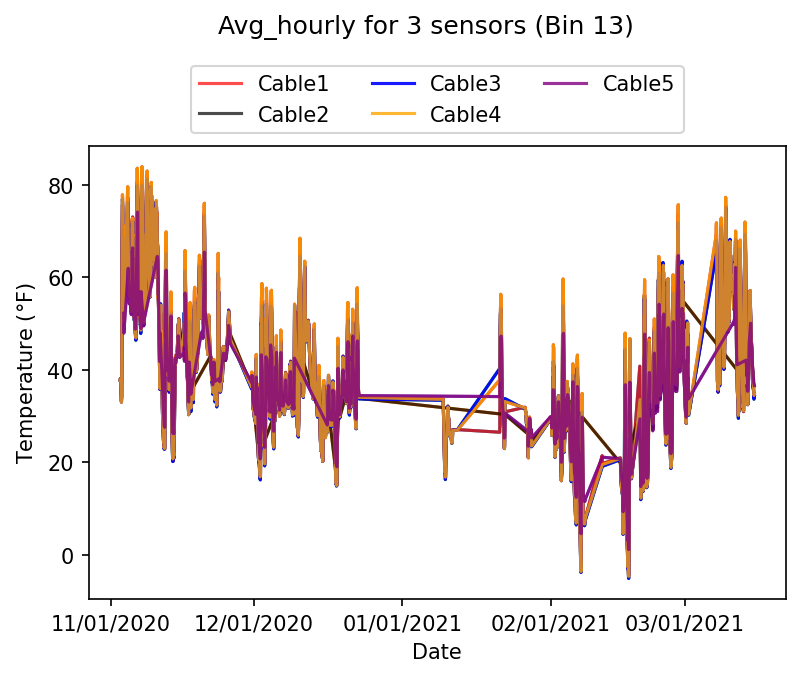

In [158]:
fig, ax = plt.subplots(dpi=150)
ax.plot(c1['OPI_DATE'].values, c1['C1s-avg'].values)
ax.plot(c2['OPI_DATE'].values, c2['C2s-avg'].values)
ax.plot(c3['OPI_DATE'].values, c3['C3s-avg'].values)
ax.plot(c4['OPI_DATE'].values, c4['C4s-avg'].values)
ax.plot(c5['OPI_DATE'].values, c5['C5s-avg'].values)
#Title box and legend
fig.suptitle('Avg_hourly for 3 sensors' ' (Bin 13)', y=1.1)
date_form = DateFormatter("%m/%d/%Y")
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');

line1 = ax.plot(c1['OPI_DATE'].values, c1['C1s-avg'].values, color= 'red', label='Cable1', alpha=0.7)
line2 = ax.plot(c2['OPI_DATE'].values, c2['C2s-avg'].values, color= 'black', label='Cable2', alpha=0.7)
line3 = ax.plot(c3['OPI_DATE'].values, c3['C3s-avg'].values, color= 'blue', label='Cable3', alpha=0.9)
line4 = ax.plot(c4['OPI_DATE'].values, c4['C4s-avg'].values, color= 'orange', label='Cable4',alpha=0.8)
line5 = ax.plot(c5['OPI_DATE'].values, c5['C5s-avg'].values, color= 'purple', label='Cable5', alpha=0.8)
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);




# line2 = ax.plot(nighttime['Date'].values, nighttime['Temp_Headspace'].values, color= '#189430', label='Night_time', alpha=0.4)
# line3 = ax.plot(daytime_mov_avg['Date'].values, daytime_mov_avg['Temp_Headspace'].values, color= 'red', label='Day_time_Moving_Avg (12hrs)')
# line4 = ax.plot(nighttime_mov_avg['Date'].values, nighttime_mov_avg['Temp_Headspace'].values, color= '#189430', label='Night_time_Moving_Avg (12hrs)')

In [ ]:
# # Moving average daytime
# temp = c1_hour_df.rolling(12).mean()
# c1_mov_avg = c1_hour_df[['OPI_DATE']].copy()
# c1_mov_avg = pd.concat([c1_mov_avg, temp], axis=1)
# c1_mov_avg = c1_mov_avg.dropna()
# c1_mov_avg

In [ ]:
# # Moving average daytime c2
# temp = c2_hour_df.rolling(12).mean()
# c2_mov_avg = c2_hour_df[['OPI_DATE']].copy()
# c2_mov_avg = pd.concat([c2_mov_avg, temp], axis=1)
# c2_mov_avg = c2_mov_avg.dropna()
# c2_mov_avg

In [113]:
def get_daily_avg(original_df, time_column, value_column):
    output = []
    current_day = pd.Timestamp(original_df[time_column].values.min())
    current_day = datetime(year=current_day.year, month=current_day.month, day=current_day.day)
    end_date = pd.Timestamp(original_df[time_column].values.max())
    while current_day < end_date:
        
        day_df = original_df[(original_df[time_column] > current_day) & 
       (original_df[time_column] < current_day + timedelta(days=1))]
        output.append({
            time_column: current_day,
            value_column: day_df[value_column].mean()
        })
        current_day = current_day + timedelta(days=1)
    return pd.DataFrame(output, columns=[time_column, value_column])

In [122]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c1_daily_avg = get_daily_avg(c1, 'OPI_DATE', 'C1s-avg')
c1_daily_avg['C1-daily'] = c1_daily_avg['C1s-avg'].copy()
c1_daily_avg = c1_daily_avg.drop(['C1s-avg'], axis=1)
c1_daily_avg = c1_daily_avg.dropna()
c1_daily_avg

,OPI_DATE,C1-daily
0,2020-11-03,52.659420
1,2020-11-04,65.738889
2,2020-11-05,58.975000
3,2020-11-06,57.031008
4,2020-11-07,55.280952
...,...,...
128,2021-03-11,55.183333
129,2021-03-12,45.844444
130,2021-03-13,46.886111
131,2021-03-14,45.460870


In [123]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c2_daily_avg = get_daily_avg(c2, 'OPI_DATE', 'C2s-avg')
c2_daily_avg['C2-daily'] = c2_daily_avg['C2s-avg'].copy()
c2_daily_avg = c2_daily_avg.drop(['C2s-avg'], axis=1)
c2_daily_avg = c2_daily_avg.dropna()
c2_daily_avg

,OPI_DATE,C2-daily
0,2020-11-17,36.172549
4,2020-11-21,42.388889
5,2020-11-22,38.907018
6,2020-11-23,38.229167
7,2020-11-24,40.345455
8,2020-11-25,46.606667
13,2020-11-30,36.715686
15,2020-12-02,26.381818
16,2020-12-03,25.277778
19,2020-12-06,32.257143


In [124]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c3_daily_avg = get_daily_avg(c3, 'OPI_DATE', 'C3s-avg')
c3_daily_avg['C3-daily'] = c3_daily_avg['C3s-avg'].copy()
c3_daily_avg = c3_daily_avg.drop(['C3s-avg'], axis=1)
c3_daily_avg = c3_daily_avg.dropna()
c3_daily_avg

,OPI_DATE,C3-daily
0,2020-11-03,52.407246
1,2020-11-04,64.233333
2,2020-11-05,58.680556
3,2020-11-06,57.446512
4,2020-11-07,54.764021
...,...,...
128,2021-03-11,54.998611
129,2021-03-12,46.090278
130,2021-03-13,46.997222
131,2021-03-14,45.391304


In [125]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c4_daily_avg = get_daily_avg(c4, 'OPI_DATE', 'C4s-avg')
c4_daily_avg['C4-daily'] = c4_daily_avg['C4s-avg'].copy()
c4_daily_avg = c4_daily_avg.drop(['C4s-avg'], axis=1)
c4_daily_avg = c4_daily_avg.dropna()
c4_daily_avg

,OPI_DATE,C4-daily
0,2020-11-03,52.936232
1,2020-11-04,65.157576
2,2020-11-05,58.979167
3,2020-11-06,58.010078
4,2020-11-07,55.412698
...,...,...
128,2021-03-11,55.283333
129,2021-03-12,46.356944
130,2021-03-13,47.572222
131,2021-03-14,45.507246


In [126]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c5_daily_avg = get_daily_avg(c5, 'OPI_DATE', 'C5s-avg')
c5_daily_avg['C5-daily'] = c5_daily_avg['C5s-avg'].copy()
c5_daily_avg = c5_daily_avg.drop(['C5s-avg'], axis=1)
c5_daily_avg = c5_daily_avg.dropna()
c5_daily_avg

,OPI_DATE,C5-daily
0,2020-11-03,49.216667
1,2020-11-04,56.476190
2,2020-11-05,56.749275
3,2020-11-06,56.091176
4,2020-11-07,51.286957
...,...,...
118,2021-03-01,36.221053
128,2021-03-11,51.801961
130,2021-03-13,40.833333
131,2021-03-14,41.956250


In [138]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = c1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['C1_Daily_Average'] = c1_daily_avg[['C1-daily']].copy()
to_be_save_df['C2_Daily_Average'] = c2_daily_avg[['C2-daily']].copy()
to_be_save_df['C3_Daily_Average'] = c3_daily_avg[['C3-daily']].copy()
to_be_save_df['C4_Daily_Average'] = c4_daily_avg[['C4-daily']].copy()
to_be_save_df['C5_Daily_Average'] = c5_daily_avg[['C5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path / 'Daily Average.csv')

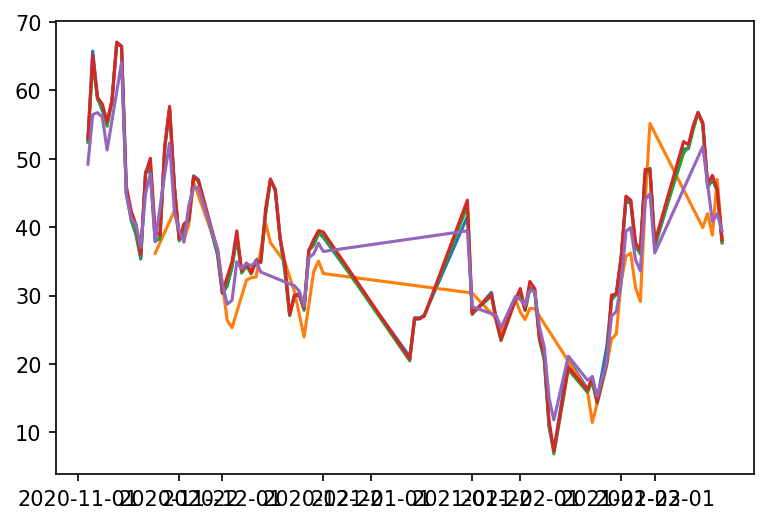

In [139]:
fig, ax = plt.subplots(dpi=150)
ax.plot(c1_daily_avg['OPI_DATE'].values, c1_daily_avg['C1-daily'].values)
ax.plot(c2_daily_avg['OPI_DATE'].values, c2_daily_avg['C2-daily'].values)
ax.plot(c3_daily_avg['OPI_DATE'].values, c3_daily_avg['C3-daily'].values)
ax.plot(c4_daily_avg['OPI_DATE'].values, c4_daily_avg['C4-daily'].values)
ax.plot(c5_daily_avg['OPI_DATE'].values, c5_daily_avg['C5-daily'].values)

NameError: name 'daytime' is not defined

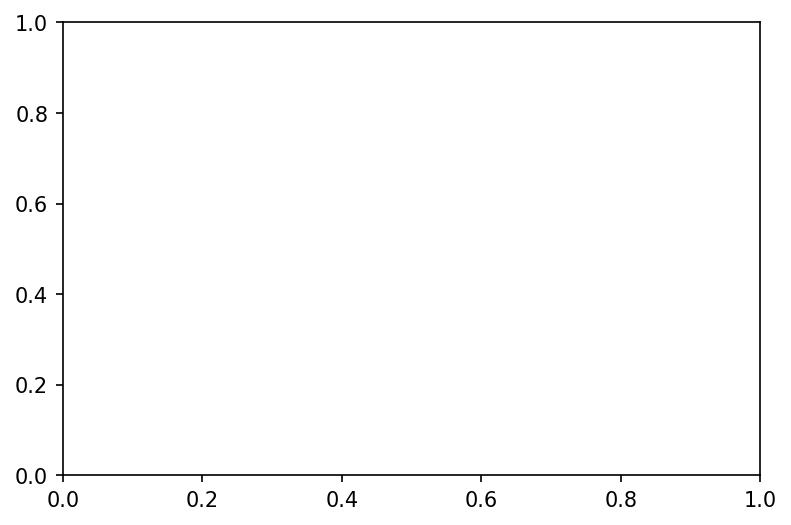

In [127]:
#title, labels and colors for graph
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(daytime['Date'].values, daytime['Temp_Headspace'].values, color= 'red', label='Day_time', alpha=0.5)
line2 = ax.plot(nighttime['Date'].values, nighttime['Temp_Headspace'].values, color= '#189430', label='Night_time', alpha=0.4)
line3 = ax.plot(daytime_mov_avg['Date'].values, daytime_mov_avg['Temp_Headspace'].values, color= 'red', label='Day_time_Moving_Avg (12hrs)')
line4 = ax.plot(nighttime_mov_avg['Date'].values, nighttime_mov_avg['Temp_Headspace'].values, color= '#189430', label='Night_time_Moving_Avg (12hrs)')
# ax.plot(date_grain_df.Date_Grain.to_numpy(), date_grain_df.Grain_Avg_RH.to_numpy(), 'b')
date_form = DateFormatter("%m/%d/%Y")
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
# ax2.set_ylabel('RH (%)')
#Title box and legend
fig.suptitle('Day_and_Night_Time GrainTemp', y=1.1)
ax.set_xlabel('Date')
#ax.set_ylabel('$CO_2$ x 1000 ppm');
#ax2.set_ylabel('Temperature, $\degree$F');
lns = line1 + line2 + line3 + line4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
plt.xlim([datetime(2020, 11, 6), datetime(2021, 3, 20)])
filename = path / 'DayTime_GrainTemp.jpeg'
plt.savefig(filename, bbox_inches='tight')
